<a href="https://colab.research.google.com/github/jiyeon1357/class_deeplearning/blob/main/%EA%B3%BC%EC%A0%9C_4_attention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
os.getcwd()
os.chdir('./drive/MyDrive/deep-learning-from-scratch-2-master/')

## 어텐션을 갖춘 seq2seq의 학습

| 에폭 1 |  반복 1 / 351 | 시간 0[s] | 손실 4.08
| 에폭 1 |  반복 21 / 351 | 시간 12[s] | 손실 3.09
| 에폭 1 |  반복 41 / 351 | 시간 24[s] | 손실 1.90
| 에폭 1 |  반복 61 / 351 | 시간 36[s] | 손실 1.72
| 에폭 1 |  반복 81 / 351 | 시간 47[s] | 손실 1.46
| 에폭 1 |  반복 101 / 351 | 시간 59[s] | 손실 1.19
| 에폭 1 |  반복 121 / 351 | 시간 71[s] | 손실 1.14
| 에폭 1 |  반복 141 / 351 | 시간 83[s] | 손실 1.09
| 에폭 1 |  반복 161 / 351 | 시간 95[s] | 손실 1.06
| 에폭 1 |  반복 181 / 351 | 시간 107[s] | 손실 1.04
| 에폭 1 |  반복 201 / 351 | 시간 119[s] | 손실 1.03
| 에폭 1 |  반복 221 / 351 | 시간 130[s] | 손실 1.02
| 에폭 1 |  반복 241 / 351 | 시간 142[s] | 손실 1.02
| 에폭 1 |  반복 261 / 351 | 시간 154[s] | 손실 1.01
| 에폭 1 |  반복 281 / 351 | 시간 166[s] | 손실 1.00
| 에폭 1 |  반복 301 / 351 | 시간 178[s] | 손실 1.00
| 에폭 1 |  반복 321 / 351 | 시간 189[s] | 손실 1.00
| 에폭 1 |  반복 341 / 351 | 시간 201[s] | 손실 1.00
Q 10/15/94                     
T 1994-10-15
☒ 1978-08-11
---
Q thursday, november 13, 2008  
T 2008-11-13
☒ 1978-08-11
---
Q Mar 25, 2003                 
T 2003-03-25
☒ 1978-08-11
---
Q Tuesday, November 

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54253 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_

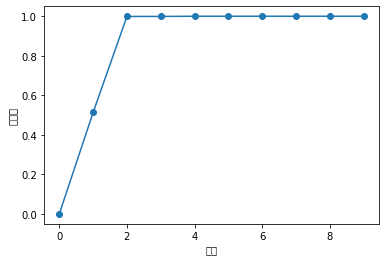

In [4]:
import sys
sys.path.append('..')
sys.path.append('../ch07')
import numpy as np
import matplotlib.pyplot as plt
from dataset import sequence
from common.optimizer import Adam
from common.trainer import Trainer
from common.util import eval_seq2seq
#from attention_seq2seq import AttentionSeq2seq
from ch08.attention_seq2seq import AttentionSeq2seq
from ch07.seq2seq import Seq2seq
from ch07.peeky_seq2seq import PeekySeq2seq


# 데이터 읽기
(x_train, t_train), (x_test, t_test) = sequence.load_data('date.txt')
char_to_id, id_to_char = sequence.get_vocab()

# 입력 문장 반전
x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]

# 하이퍼파라미터 설정
vocab_size = len(char_to_id)
wordvec_size = 16
hidden_size = 256
batch_size = 128
max_epoch = 10
max_grad = 5.0

model = AttentionSeq2seq(vocab_size, wordvec_size, hidden_size)
# model = Seq2seq(vocab_size, wordvec_size, hidden_size)
# model = PeekySeq2seq(vocab_size, wordvec_size, hidden_size)

optimizer = Adam()
trainer = Trainer(model, optimizer)

acc_list = []
for epoch in range(max_epoch):
    trainer.fit(x_train, t_train, max_epoch=1,
                batch_size=batch_size, max_grad=max_grad)

    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        correct_num += eval_seq2seq(model, question, correct,
                                    id_to_char, verbose, is_reverse=True)

    acc = float(correct_num) / len(x_test)
    acc_list.append(acc)
    print('정확도 %.3f%%' % (acc * 100))


model.save_params()

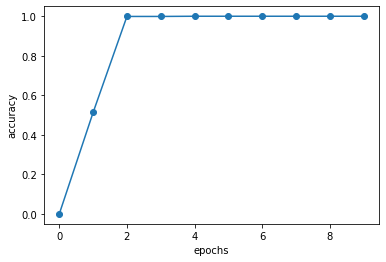

In [5]:
# 그래프 그리기
x = np.arange(len(acc_list))
plt.plot(x, acc_list, marker='o')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(-0.05, 1.05)
plt.show()